### Data Science Final Project



#### Submitted by:
#### 1. Raphael Damouny 
#### 2. Moran Farraj 



# Libraries and Imports

In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


import os
import warnings

Introduction and Background

Project Aim:

The aim of this project is to analyze and understand the dynamics of crime rates across different cities in israel from 2014-2019, and that is by using various datasets including demographic, geographic and election data, alongside crime data and statistics, we intend to apply machine learning algorithms and build a predictive model that can accurately forecast changes in crime rates.

Project Significance:

The significance of this project is to help us figure out what afffects crime rates in different cities, understanding theese dynamics can help policymakers and law enforcement agencies devise more effective strategies for crime prevention and public safety enhancment.
plus, if we can predict how crime rates might go up and down, we can be better prepared.

Hypothsis Question:

Discussion: "Can we predict a decrease/increase in crime proportions for different citites across israel?"

Data Cleaning & Pre-Processing:

Data Cleaning:

Translation: During the initial data review, we noticed that the datasets are in different languages (mostly in hebrew), so we had to translate them to english, we did not have a large number of features, thus we decided to translate them manually.

Irrelevant Feature Removal: There was some columns in the datasets that are not useful and relevant for our analysis, and we saw that it would not contribute to our model, so we decided to droo them using the drop() function.

Data Pre-Processing:
Handling Missing Values: We also noticed during the initial data review that some columns have missing values. The strategy here would be based on the type and nature of the data:
for numerical data, we can fill in the missing values with mean or meadian of the column.
for categorical data we can fill in the missing values with the mode of the column.
if a column has too many missing values (i.e. more than 50%), it might be best to drop it.

Data Normalization: Machine learning algorithms perform better when the numerical values are on the same scale, Here we would use techniques like Min-Max normalization or standard scaler to ensure all numerical values have a similiar scaling.

Exploratory Data Analysis:
Data Distribution Analysis: understanding the distribution of our data can provide insights onto the data's structure and outliers.
Correlation Analysis: understanding the correlation between features can help us understand the relationship between them, and that can help us decide which features to use in our model.
Outlier Detection: Outliers can greatly affect certain algorithms, we should identify them and decide how to handle them, we can use the Z-score method or the IQR method to detect outliers.

Feature Engineering & Selection:

Feature Engineering: Creating a new features can often provide more value to the machine learning models.

Feature Transformation: Certain machine learning algorithms work better when the data is normally distributed, we might apply transformation methods to make the data more normally distributed.

Feature Encoding: Machine learning models require numerical input, so we might need to encode the categorical features.

Feature Selection: Selecting the most relevant features can help improve the performance and reduce overfitting, we can use techniques like correlation analysis or use LASO algorithm for the feature selection.






# Datasets

### Used Datasets in the analysis:

Crimes Data: for our analysis, we used crimes data that contains the count of each crime type for several cities in israel between 2014-2019.
The data contains city_code, city_name, year, crime_type, count for every year.

Cities Data: we also used data that contains demographic, geographic, and administrative data about each city. 

Elections Data: We used the data for the 2015 elections an 2019 elections, which contains the number of votes for each party in each city.
The elections datasets we have displays the number of votes for each party in each town.


    city_code (סמל ישוב) - this column is common among all files, will be used to join the dataframes.

In [2]:
# Reading the data
crimes = pd.read_csv('crimes.csv', encoding='utf-8')
cities = pd.read_csv('cities.csv', encoding='utf-8')
elections20 = pd.read_csv('elections20.csv', encoding='utf-8')
elections19 = pd.read_csv('elections19.csv', encoding='utf-8')

# Pre-Processing & Data Cleaning

## Handling Crimes Data 

In [3]:
crimes

,סמל ישוב,יישוב מחושב,תאור קבוצה סטטיסטית,שנת הודעה,Total,2019,2018,2017,2016,2015,2014
0,NaN,Total,NaN,NaN,1973220,301142,320713,329265,328681,339804,353615
1,472.0,אבו גוש,Total,NaN,1997,338,284,310,340,323,402
2,472.0,אבו גוש,-,NaN,4,2,2,-,-,-,-
3,472.0,אבו גוש,עבירות בטחון,NaN,55,7,9,8,6,15,10
4,472.0,אבו גוש,עבירות כלכליות,NaN,3,1,-,-,-,2,-
...,...,...,...,...,...,...,...,...,...,...,...
3678,1054.0,תל שבע,עבירות נגד גוף,NaN,1107,179,188,202,189,171,178
3679,1054.0,תל שבע,עבירות סדר ציבורי,NaN,2112,427,444,344,316,262,319
3680,1054.0,תל שבע,עבירות רשוי,NaN,41,6,10,9,8,1,7
3681,1054.0,תל שבע,עבירות תנועה,NaN,67,7,13,16,12,9,10


In [4]:
crimes['יישוב מחושב'].nunique()

257

Translating crimes data from Hebrew to English

In [5]:
crimes = crimes.replace({
    'סעיפי הגדרה': 'Definition clauses',
    'עבירות כלפי המוסר': 'Offenses against morality',
    'עבירות כלכליות': 'Economic offenses',
    'עבירות כלפי הרכוש': 'Offenses against property',
    'עבירות מין': 'Sexual offenses',
    'עבירות מרמה': 'Fraudulent offences',
    'עבירות נגד אדם': 'Offenses against a person',
    'עבירות נגד גוף': 'Offenses against the body',
    'עבירות סדר ציבורי': 'Public order offences',
    'עבירות רשוי': 'Licensing offences',
    'עבירות תנועה': 'Traffic violations',
    'שאר עבירות': 'Other offences',
    'עבירות בטחון': 'Security offenses',
    'עבירות מנהליות': 'Administrative offenses'
}
)
crimes = crimes.rename(columns={'סמל ישוב': 'city code' ,'תאור קבוצה סטטיסטית': 'group description'})
crimes = crimes[['city code','group description','2019','2018','2017','2016','2015','2014']]
#easier to identify the null values
crimes = crimes.replace('-', np.nan)

In [6]:
print('Null Values Percentage\n',crimes.isnull().sum()/len(crimes)*100)

Null Values Percentage
 city code             0.027152
group description     5.430356
2019                 18.870486
2018                 18.381754
2017                 19.440673
2016                 19.332066
2015                 19.250611
2014                 19.033397
dtype: float64


In [7]:
crimes

,city code,group description,2019,2018,2017,2016,2015,2014
0,NaN,NaN,301142,320713,329265,328681,339804,353615
1,472.0,Total,338,284,310,340,323,402
2,472.0,NaN,2,2,NaN,NaN,NaN,NaN
3,472.0,Security offenses,7,9,8,6,15,10
4,472.0,Economic offenses,1,NaN,NaN,NaN,2,NaN
...,...,...,...,...,...,...,...,...
3678,1054.0,Offenses against the body,179,188,202,189,171,178
3679,1054.0,Public order offences,427,444,344,316,262,319
3680,1054.0,Licensing offences,6,10,9,8,1,7
3681,1054.0,Traffic violations,7,13,16,12,9,10


#### Imputation: filling null values with 0

In [8]:
crimes.drop(0, inplace=True)
crimes.fillna(0, inplace=True)
crimes.isnull().sum()

city code            0
group description    0
2019                 0
2018                 0
2017                 0
2016                 0
2015                 0
2014                 0
dtype: int64

#### Casting the columns

In [9]:
#cast to int
crimes['city code'] = crimes['city code'].astype(int)
crimes['2019'] = crimes['2019'].astype(float)
crimes['2018'] = crimes['2018'].astype(float)
crimes['2017'] = crimes['2017'].astype(float)
crimes['2016'] = crimes['2016'].astype(float)
crimes['2015'] = crimes['2015'].astype(float)
crimes['2014'] = crimes['2014'].astype(float)
crimes['group description'] = crimes['group description'].astype(str)

Filtering crimes types based on the needs of our analysis:
1. offense against a person, offenses against the body and security offenses are all categorized as violent crimes.
2. Offenses against property, Economic offenses, and Fraudulent offences are categorized as Property Crimes.
3. Offenses against morality and Sexual offenses are categorized as Sexual and Morality Crimes.
4. Public order offences are categorized as Public Order Crimes.

    we decided to drop the other crimes types from the dataset, since they did not have enough observations and not relevant to our analysis.

In [10]:
crime_mapping = {
    'Offenses against a person': 'Violent Crimes',
    'Offenses against the body': 'Violent Crimes',
    'Security offenses': 'Violent Crimes',
    'Offenses against property': 'Property Crimes',
    'Economic offenses': 'Property Crimes',
    'Fraudulent offences': 'Property Crimes',
    'Offenses against morality': 'Sexual and Morality Crimes',
    'Sexual offenses': 'Sexual and Morality Crimes',
    'Public order offences': 'Public Order Crimes',  
    'Total': 'Total'  
}

# Apply the mapping to the 'group description' column
crimes['group description'] = crimes['group description'].map(crime_mapping)

# Handle any null/missing values that may appear if there are unaccounted categories
crimes['group description'] = crimes['group description'].fillna('Unspecified')
crimes = crimes.groupby(['city code','group description']).sum().reset_index()
crimes = crimes[crimes['group description'] != 'Unspecified']
crimes = crimes[crimes['group description'] != 'Total']
crimes = crimes[['city code', 'group description', '2014', '2015', '2016', '2017', '2018', '2019']]
crimes = crimes[crimes['city code'] > 0]



In [11]:
crimes

,city code,group description,2014,2015,2016,2017,2018,2019
12,26,Property Crimes,113.0,91.0,106.0,97.0,106.0,93.0
13,26,Public Order Crimes,60.0,72.0,93.0,74.0,73.0,58.0
14,26,Sexual and Morality Crimes,54.0,47.0,57.0,47.0,56.0,41.0
17,26,Violent Crimes,20.0,30.0,21.0,22.0,24.0,25.0
18,28,Property Crimes,172.0,194.0,192.0,154.0,122.0,109.0
...,...,...,...,...,...,...,...,...
1209,9700,Violent Crimes,220.0,244.0,245.0,265.0,228.0,212.0
1210,9800,Property Crimes,403.0,325.0,279.0,303.0,304.0,212.0
1211,9800,Public Order Crimes,103.0,150.0,146.0,171.0,136.0,114.0
1212,9800,Sexual and Morality Crimes,35.0,47.0,31.0,56.0,58.0,106.0


### Visualizations for crimes data: we used the data to create several visualizations that will help us understand the data better.

Trend of total crimes over the years

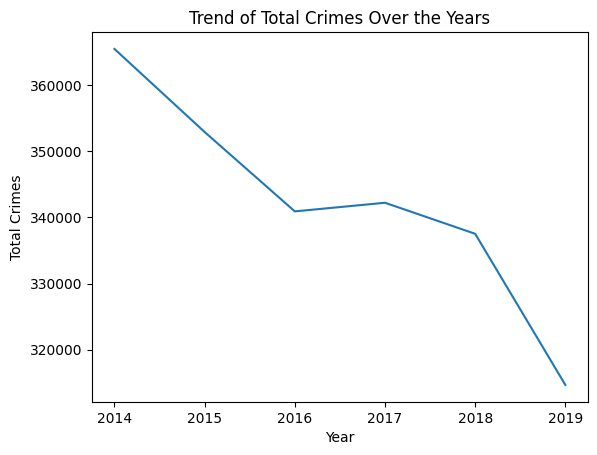

In [12]:
years = ['2014', '2015', '2016', '2017', '2018', '2019']
total_crimes_per_year = crimes[years].sum()

plt.plot(total_crimes_per_year)
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Trend of Total Crimes Over the Years')
plt.show()

    There are a decrease in the total number of crimes over the years.

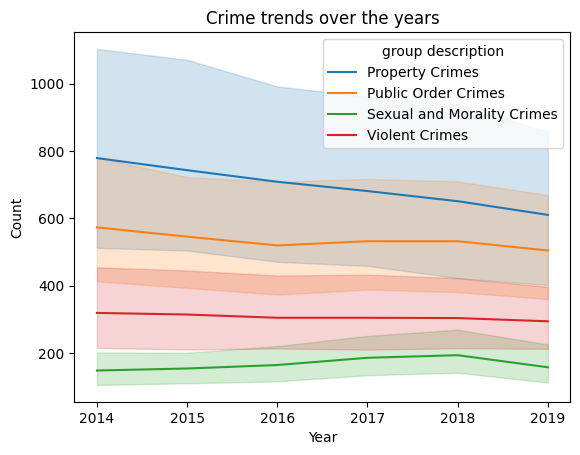

In [13]:
# Transpose the DataFrame to get years as rows and crime types as columns
df_transposed = crimes.melt(id_vars='group description', value_vars=['2014', '2015', '2016', '2017', '2018', '2019'], var_name='Year', value_name='Count')
sns.lineplot(data=df_transposed, x='Year', y='Count', hue='group description')
plt.title('Crime trends over the years')
plt.show()

    Here we can see that the decrease is almost among all the crime types.

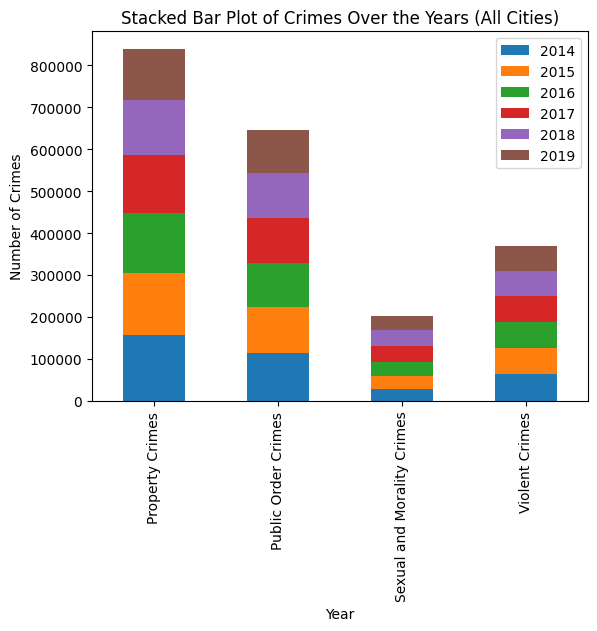

In [14]:
#sum of crimes per type per year for all cities
grouped_df = crimes.iloc[:,1:].groupby('group description').sum()

grouped_df.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Crimes Over the Years (All Cities)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


## Handling Cities Data

In [15]:
cities

,שם ישוב,סמל ישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
0,אבו ג'ווייעד (שבט),967,ABU JUWEI'ID,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,2.040057e+09,NaN,699.0,15003711.0,2018,Abu Juway'ad,NaN
1,אבו גוש,472,ABU GHOSH,1,11,111.0,99.0,444.0,2.0,7543.0,...,NaN,280,NaN,2.105263e+09,598.0,152.0,10002475.0,2018,Abu Ghosh,NaN
2,אבו סנאן,473,ABU SINAN,2,24,245.0,99.0,NaN,2.0,13915.0,...,NaN,270,NaN,2.160776e+09,19.0,252.0,10004315.0,2018,Abu Sinan,NaN
3,אבו סריחאן (שבט),935,ABU SUREIHAN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.865057e+09,NaN,699.0,10001937.0,2018,Abu Surayhan,NaN
4,אבו עבדון (שבט),958,ABU ABDUN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.850058e+09,NaN,699.0,10001937.0,2018,Abu 'Abdun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,תקומה,665,TEQUMA,6,62,621.0,39.0,NaN,1.0,699.0,...,1949,310,2.0,1.600360e+09,109.0,651.0,10001930.0,2018,Tequma,620.0
1478,תקוע,3563,TEQOA,7,76,NaN,76.0,445.0,1.0,3882.0,...,1977,190,NaN,2.218962e+09,566.0,714.0,15000586.0,2018,Teqoa,NaN
1479,תראבין א-צאנע (שבט),970,TARABIN AS-SANI,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.830056e+09,NaN,699.0,10001946.0,2018,Tarabin as-Sani',NaN
1480,תרבין א-צאנע (יישוב)*,1346,TARABIN AS-SANI,6,62,623.0,69.0,341.0,2.0,1089.0,...,NaN,450,NaN,1.752658e+09,210.0,624.0,10001946.0,2018,Tarabin As-Sani,610.0


In [16]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   שם ישוב                1482 non-null   object 
 1   סמל ישוב               1482 non-null   int64  
 2   תעתיק                  1261 non-null   object 
 3   מחוז                   1482 non-null   int64  
 4   נפה                    1482 non-null   int64  
 5   אזור טבעי              1334 non-null   float64
 6   מעמד מונציפאלי         1405 non-null   float64
 7   שיוך מטרופוליני        553 non-null    float64
 8   דת יישוב               1246 non-null   float64
 9   סך הכל אוכלוסייה 2018  1218 non-null   float64
 10  יהודים ואחרים          1187 non-null   float64
 11  מזה: יהודים            1161 non-null   float64
 12  ערבים                  544 non-null    float64
 13  שנת ייסוד              1089 non-null   object 
 14  צורת יישוב שוטפת       1482 non-null   int64  
 15  השתי

### Features to drop:
1. city name in hebrew - we have 4 different presentaions of each city, we can keep city code and city name in english.
2. Coordinates - as we are not planning to conduct spatial analysis.
3. year of message - all the values in the column are null.
4. population - we have population for each group, we can drop the total population column.
5. אשכול רשויות מקומיות, ועדת תכנון, גובה,צורת יישוב שוטפת, שנה,אזור טבעי,נפה ,  השתייכות ארגוני, מעמד מונציפאלי, שיוך מטרופוליני, 

In [17]:
#columns to keep
cities = cities[['סמל ישוב','תעתיק', 'מחוז','דת יישוב','יהודים ואחרים','מזה: יהודים','ערבים','מרחב משטרה']]

Translating the cities data from Hebrew to English

In [18]:
# Create a dictionary mapping the Hebrew names to the English ones
column_names_translation = {
    'סמל ישוב': 'city code',
    'תעתיק': 'city name',
    'מחוז': 'district',
    'דת יישוב': 'religion',
    'יהודים ואחרים': 'jews_and_others',
    'מזה: יהודים': 'jews',
    'ערבים': 'arabs',
    'מרחב משטרה': 'police_space',
}

# Use the rename method to change the column names
cities.rename(columns=column_names_translation, inplace=True)
cities

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20836\1335360167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities.rename(columns=column_names_translation, inplace=True)


,city code,city name,district,religion,jews_and_others,jews,arabs,police_space
0,967,ABU JUWEI'ID,6,3.0,NaN,NaN,NaN,15003711.0
1,472,ABU GHOSH,1,2.0,97.0,79.0,7446.0,10002475.0
2,473,ABU SINAN,2,2.0,28.0,11.0,13887.0,10004315.0
3,935,ABU SUREIHAN,6,3.0,NaN,NaN,NaN,10001937.0
4,958,ABU ABDUN,6,3.0,NaN,NaN,NaN,10001937.0
...,...,...,...,...,...,...,...,...
1477,665,TEQUMA,6,1.0,699.0,699.0,NaN,10001930.0
1478,3563,TEQOA,7,1.0,3880.0,3840.0,2.0,15000586.0
1479,970,TARABIN AS-SANI,6,3.0,NaN,NaN,NaN,10001946.0
1480,1346,TARABIN AS-SANI,6,2.0,6.0,6.0,1083.0,10001946.0


#### Visualizations for cities data: we used the data to create several visualizations that will help us understand the data better.

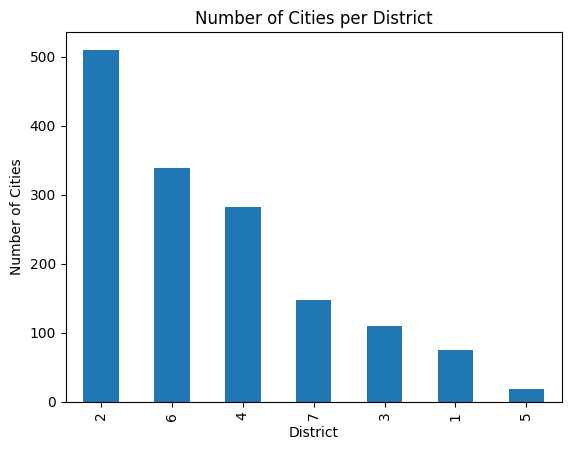

In [19]:
cities['district'].value_counts().plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Number of Cities')
plt.title('Number of Cities per District')
plt.show()

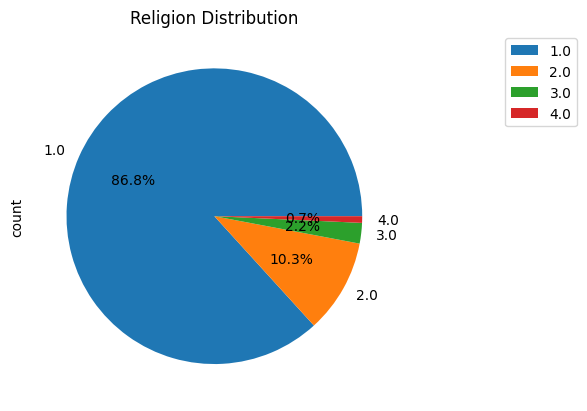

In [20]:
cities['religion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Religion Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

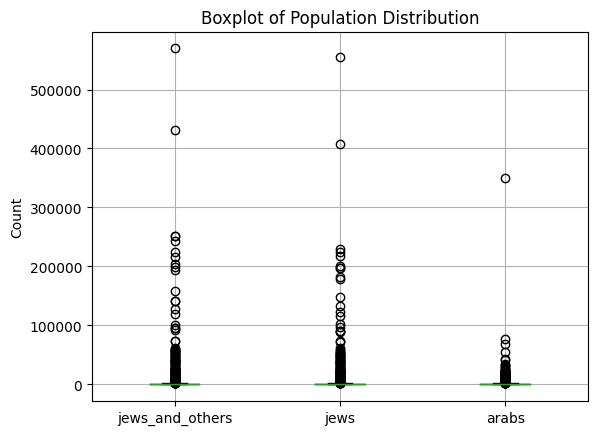

In [21]:
cities.boxplot(column=['jews_and_others', 'jews', 'arabs'])
plt.ylabel('Count')
plt.title('Boxplot of Population Distribution')
plt.show()

## Handling Elections Data

each party in the dataset was presented as the party initials, so we decided to aggregate the parties by:
1. left wing parties
2. arab parties
3. right wing parties
4. religious parties
5. center parties
6. did not pass the threshold parties


##### We decided to create a new column "ChangeOfPower" which indicates a change in the most recieving party in the city between the 2015 elections and the 2019 elections, 1 if there was a change, else 0.

#### 2015 Elections:

In [22]:
cols = elections19.columns.tolist()

for i in range(len(cols)):
    if '.' in cols[i]:
        cols[i] = int(float(cols[i]))
        cols[i] = str(cols[i])
elections19.columns = cols
elections19 = elections19.groupby(by=elections19.columns, axis=1).sum()

#renaming סמל ישוב to city code
elections19 = elections19.rename(columns={'סמל ישוב': 'city code'})
elections19['Dominant Party 15'] = elections19[['1','2','3','4','5','6']].idxmax(axis=1)
elections19 = elections19[['city code', 'Dominant Party 15']]
elections19

,city code,Dominant Party 15
0,967,2
1,472,2
2,473,2
3,958,2
4,968,2
...,...,...
1179,665,3
1180,3563,3
1181,970,4
1182,1346,4


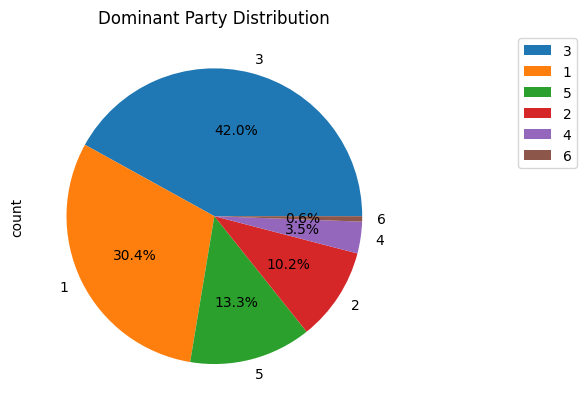

In [23]:
elections19['Dominant Party 15'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Dominant Party Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


    In this election we can see that the Right Wing parties won the majority of the votes, followed by the Left Wing parties, and the Arab parties.

#### 2019 Elections:

In [24]:
cols = elections20.columns.tolist()
for i in range(len(cols)):
    if '.' in cols[i]:
        cols[i] = int(float(cols[i]))  
        cols[i] = str(cols[i])
elections20.columns = cols
elections20 = elections20.groupby(by=elections20.columns, axis=1).sum()

#rename סמל ישוב to city code
elections20 = elections20.rename(columns={'סמל ישוב': 'city code'})
elections20['Dominant Party 19'] = elections20[['1','2','3','4','5','6']].idxmax(axis=1)
elections20 = elections20[['city code', 'Dominant Party 19']]
elections20

,city code,Dominant Party 19
0,0,3
1,967,2
2,472,2
3,473,2
4,958,2
...,...,...
1191,665,3
1192,3563,3
1193,970,2
1194,1346,2


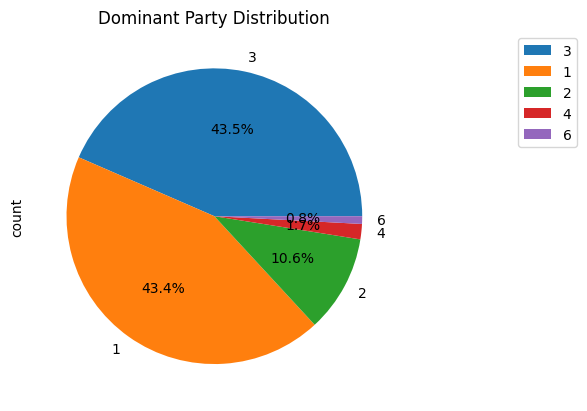

In [25]:
#pie chart of dominant party
elections20['Dominant Party 19'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Dominant Party Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


    We can see that in this election the Right Wing parties and the Left Wing parties won almost the same number of votes, followed by the Arab parties, what is interesting is that the religious parties won less votes than they did in the 2015 elections.

Checking for change of power in the cities:

In [26]:
elections = pd.merge(elections19, elections20, on='city code', how='left')
elections['change of power'] = np.where(elections['Dominant Party 15'] == elections['Dominant Party 19'], 0, 1)
elections = elections[['city code', 'Dominant Party 19' ,'change of power']]
elections

,city code,Dominant Party 19,change of power
0,967,2,0
1,472,2,0
2,473,2,0
3,958,2,0
4,968,2,0
...,...,...,...
1179,665,3,0
1180,3563,3,0
1181,970,2,1
1182,1346,2,1


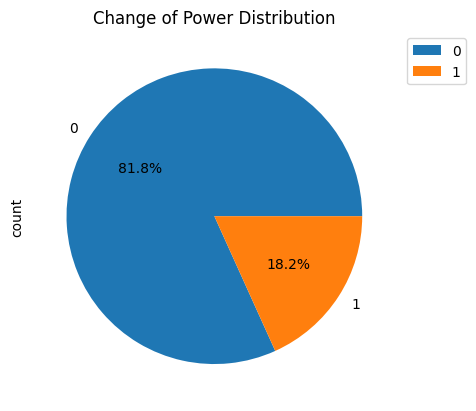

In [27]:
elections['change of power'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Change of Power Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

    we can see that almost 20% of the cities saw a change of power between the 2015 elections and the 2019 elections.

## Merging The Datasets

In [28]:
#merging the 2 dataframes 
cities_crimes = pd.merge(crimes, cities, on='city code', how='left')

#rearranging the columns
cities_crimes = cities_crimes[['city code', 'city name', 'group description','district' , 'religion', 'jews_and_others', 'jews','arabs' ,'police_space' ,'2014' ,'2015' ,'2016','2017','2018','2019']]
cities_crimes = pd.merge(cities_crimes, elections, on='city code', how='left')
cities_crimes

,city code,city name,group description,district,religion,jews_and_others,jews,arabs,police_space,2014,2015,2016,2017,2018,2019,Dominant Party 19,change of power
0,26,ROSH PINNA,Property Crimes,2,1.0,3081.0,3007.0,39.0,10004540.0,113.0,91.0,106.0,97.0,106.0,93.0,1,0.0
1,26,ROSH PINNA,Public Order Crimes,2,1.0,3081.0,3007.0,39.0,10004540.0,60.0,72.0,93.0,74.0,73.0,58.0,1,0.0
2,26,ROSH PINNA,Sexual and Morality Crimes,2,1.0,3081.0,3007.0,39.0,10004540.0,54.0,47.0,57.0,47.0,56.0,41.0,1,0.0
3,26,ROSH PINNA,Violent Crimes,2,1.0,3081.0,3007.0,39.0,10004540.0,20.0,30.0,21.0,22.0,24.0,25.0,1,0.0
4,28,MAZKERET BATYA,Property Crimes,4,1.0,14670.0,14473.0,10.0,10002241.0,172.0,194.0,192.0,154.0,122.0,109.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,9700,HOD HASHARON,Violent Crimes,4,1.0,62286.0,60949.0,39.0,10002133.0,220.0,244.0,245.0,265.0,228.0,212.0,1,1.0
800,9800,BINYAMINA-GIV'AT ADA,Property Crimes,3,1.0,15598.0,15081.0,29.0,10004333.0,403.0,325.0,279.0,303.0,304.0,212.0,1,1.0
801,9800,BINYAMINA-GIV'AT ADA,Public Order Crimes,3,1.0,15598.0,15081.0,29.0,10004333.0,103.0,150.0,146.0,171.0,136.0,114.0,1,1.0
802,9800,BINYAMINA-GIV'AT ADA,Sexual and Morality Crimes,3,1.0,15598.0,15081.0,29.0,10004333.0,35.0,47.0,31.0,56.0,58.0,106.0,1,1.0


In [29]:
pivot_crime_data = cities_crimes.pivot_table(index=['city code', 'city name', 'district', 'religion', 'jews_and_others', 'jews', 'arabs', 'police_space', 'Dominant Party 19', 'change of power'], 
                                  columns='group description', 
                                  values=['2014', '2015', '2016', '2017', '2018', '2019'])

# Reset the column names
pivot_crime_data.columns = [' '.join(col).strip() for col in pivot_crime_data.columns.values]
pivot_crime_data.reset_index(inplace=True)

# Melt the dataframe to have years and values in separate columns
melted_data = pivot_crime_data.melt(id_vars=['city code', 'city name', 'district', 'religion', 'jews_and_others', 'jews', 'arabs', 'police_space', 'Dominant Party 19', 'change of power'], 
                                    var_name='Year and Crime Type', 
                                    value_name='Number of Crimes')

split_data = melted_data['Year and Crime Type'].str.split(' ', n=1, expand=True)
melted_data['Year'] = split_data[0]
melted_data['Crime Type'] = split_data[1]

pivot_data = melted_data.pivot_table(index=['city code', 'city name', 'district', 'religion', 'jews_and_others', 'jews', 'arabs', 'police_space', 'Dominant Party 19', 'change of power','Year'], 
                                     columns='Crime Type', 
                                     values='Number of Crimes').reset_index()

pivot_data

Crime Type,city code,city name,district,religion,jews_and_others,jews,arabs,police_space,Dominant Party 19,change of power,Year,Property Crimes,Public Order Crimes,Sexual and Morality Crimes,Violent Crimes
0,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2014,113.0,60.0,54.0,20.0
1,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2015,91.0,72.0,47.0,30.0
2,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2016,106.0,93.0,57.0,21.0
3,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2017,97.0,74.0,47.0,22.0
4,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2018,106.0,73.0,56.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2015,325.0,150.0,47.0,67.0
992,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2016,279.0,146.0,31.0,55.0
993,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2017,303.0,171.0,56.0,57.0
994,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2018,304.0,136.0,58.0,58.0


# Exploratory Data Analysis & Feature Engineering

### Numerical Features distribution

array([[<Axes: title={'center': 'city code'}>,
        <Axes: title={'center': 'district'}>,
        <Axes: title={'center': 'religion'}>],
       [<Axes: title={'center': 'jews_and_others'}>,
        <Axes: title={'center': 'jews'}>,
        <Axes: title={'center': 'arabs'}>],
       [<Axes: title={'center': 'police_space'}>,
        <Axes: title={'center': 'change of power'}>,
        <Axes: title={'center': 'Property Crimes'}>],
       [<Axes: title={'center': 'Public Order Crimes'}>,
        <Axes: title={'center': 'Sexual and Morality Crimes'}>,
        <Axes: title={'center': 'Violent Crimes'}>]], dtype=object)

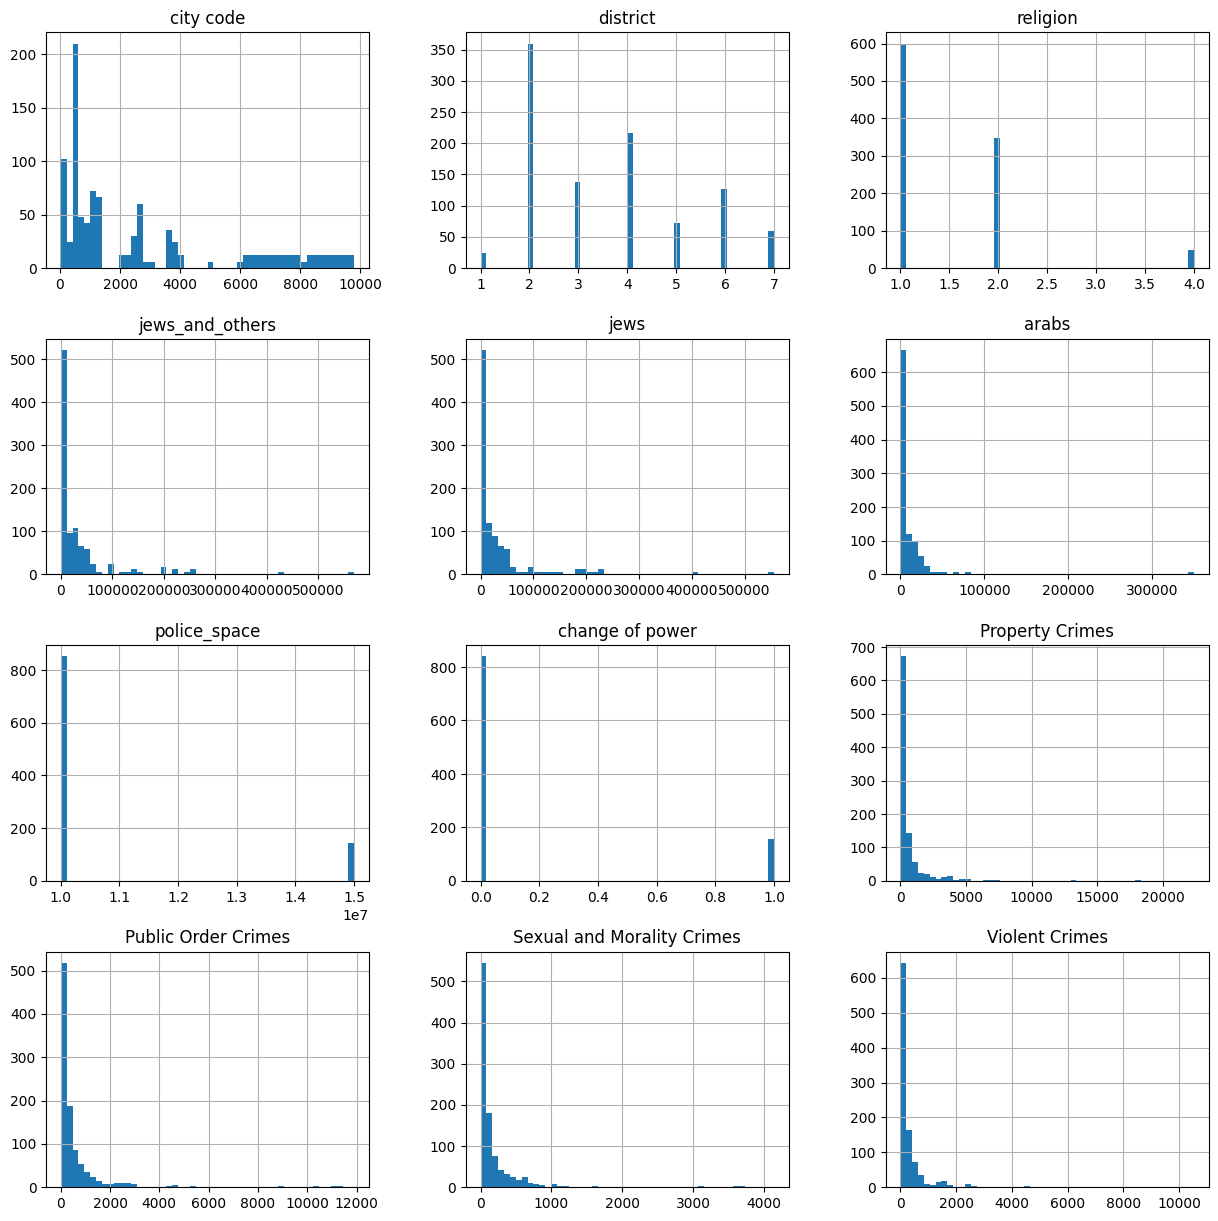

In [30]:
pivot_data.iloc[:, :].hist(bins=50, figsize=(15, 15))

In [31]:
pivot_data.isnull().sum()/len(pivot_data)

Crime Type
city code                     0.0
city name                     0.0
district                      0.0
religion                      0.0
jews_and_others               0.0
jews                          0.0
arabs                         0.0
police_space                  0.0
Dominant Party 19             0.0
change of power               0.0
Year                          0.0
Property Crimes               0.0
Public Order Crimes           0.0
Sexual and Morality Crimes    0.0
Violent Crimes                0.0
dtype: float64

## Feature Engineering

In [32]:
pivot_data['Total Crimes'] = pivot_data['Property Crimes'] + pivot_data['Public Order Crimes'] + pivot_data['Sexual and Morality Crimes'] + pivot_data['Violent Crimes']

pivot_data['Total Population'] = pivot_data['jews_and_others'] + pivot_data['arabs']
pivot_data['Crime Rate'] = pivot_data['Total Crimes'] / pivot_data['Total Population']

pivot_data = pivot_data.sort_values(by=['city code', 'Year'])
pivot_data['Total Crime Change'] = pivot_data.groupby('city code')['Total Crimes'].diff()

pivot_data['Total Crime Decrease'] = np.where(pivot_data['Total Crimes'] < pivot_data['Total Crimes'].shift(1), 1, 0)


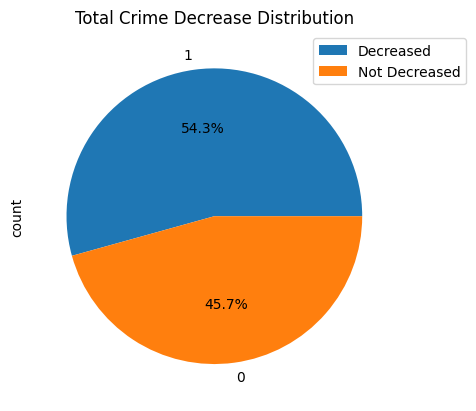

In [33]:
pivot_data['Total Crime Decrease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Crime Decrease Distribution')
labels = ['Decreased', 'Not Decreased']

plt.legend(labels,loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

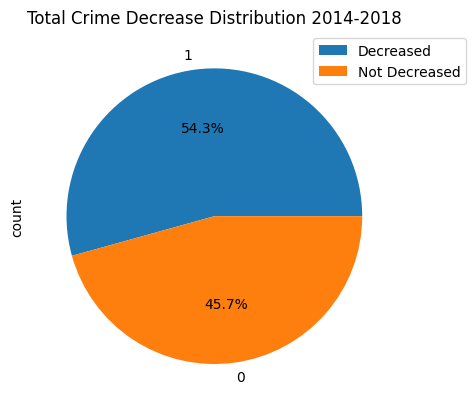

In [34]:
pivot_data_filtered = pivot_data[pivot_data['Year'] != 2019]

# Plot the pie chart with the filtered data
pivot_data_filtered['Total Crime Decrease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Crime Decrease Distribution 2014-2018')
labels = ['Decreased', 'Not Decreased']

plt.legend(labels,loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


<font color='red'> 
 Although there are 4.3% difference between the number of observations in the training data -years 2014-2018-, we can not consider this an imbalance problem, becuase the difference is not significant.
</font>

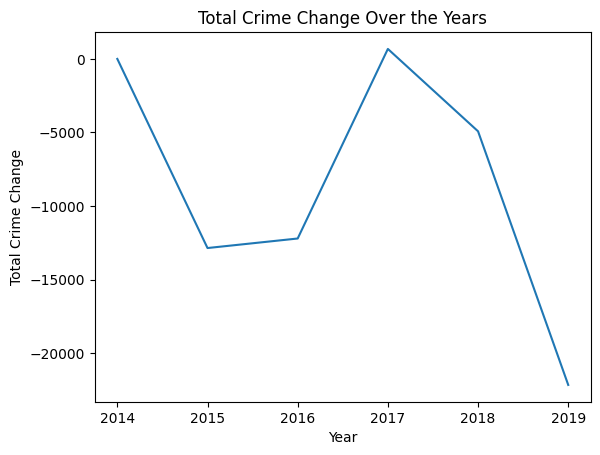

In [35]:
pivot_data.groupby('Year')['Total Crime Change'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Crime Change')
plt.title('Total Crime Change Over the Years')
plt.show()


    We can see that there was a noticable increase between the years 2016 and 2017 and then we see continous decrease until the year 2019 (this is where our data ends)

In [36]:
pivot_data.isnull().sum()/len(pivot_data)

Crime Type
city code                     0.000000
city name                     0.000000
district                      0.000000
religion                      0.000000
jews_and_others               0.000000
jews                          0.000000
arabs                         0.000000
police_space                  0.000000
Dominant Party 19             0.000000
change of power               0.000000
Year                          0.000000
Property Crimes               0.000000
Public Order Crimes           0.000000
Sexual and Morality Crimes    0.000000
Violent Crimes                0.000000
Total Crimes                  0.000000
Total Population              0.000000
Crime Rate                    0.000000
Total Crime Change            0.166667
Total Crime Decrease          0.000000
dtype: float64

    We that see that 'Total Crime Change' has 16% missing values, this is becuase for the first year of the dataset for each city, there is no previous year to calcualate the difference from. we can fill these values with 0 and that will be the baseline for each city for the next year 2015.

### Filling missing values with 0

In [37]:
pivot_data['Total Crime Change'] = pivot_data.groupby('city code')['Total Crime Change'].fillna(0)

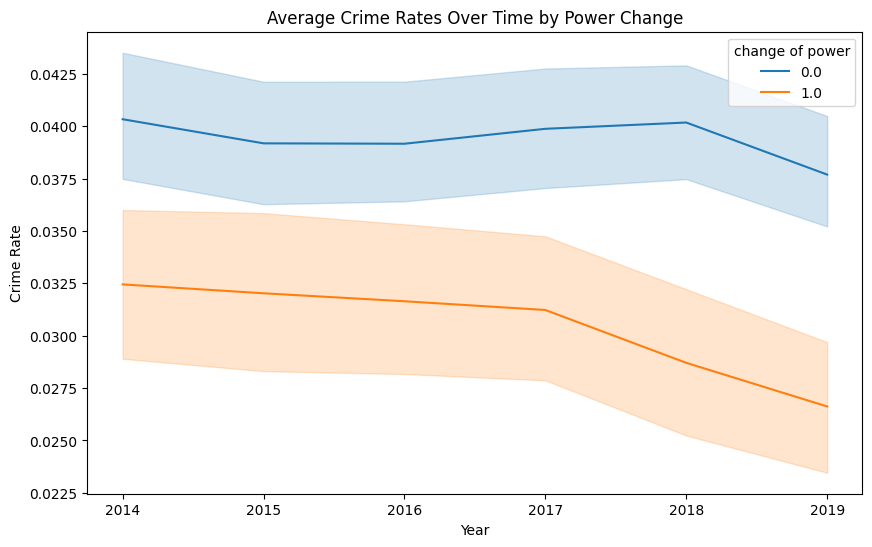

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Crime Rate', hue='change of power', data=pivot_data)
plt.title('Average Crime Rates Over Time by Power Change')
plt.show()


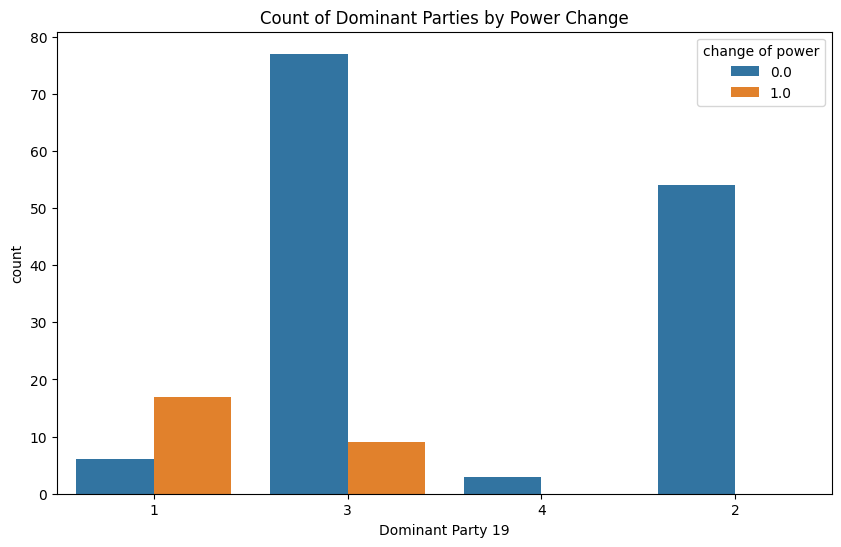

In [39]:
pivot_data_unique_cities = pivot_data.drop_duplicates(subset='city name')
plt.figure(figsize=(10,6))
sns.countplot(x='Dominant Party 19', hue='change of power', data=pivot_data_unique_cities)
plt.title('Count of Dominant Parties by Power Change')
plt.show()


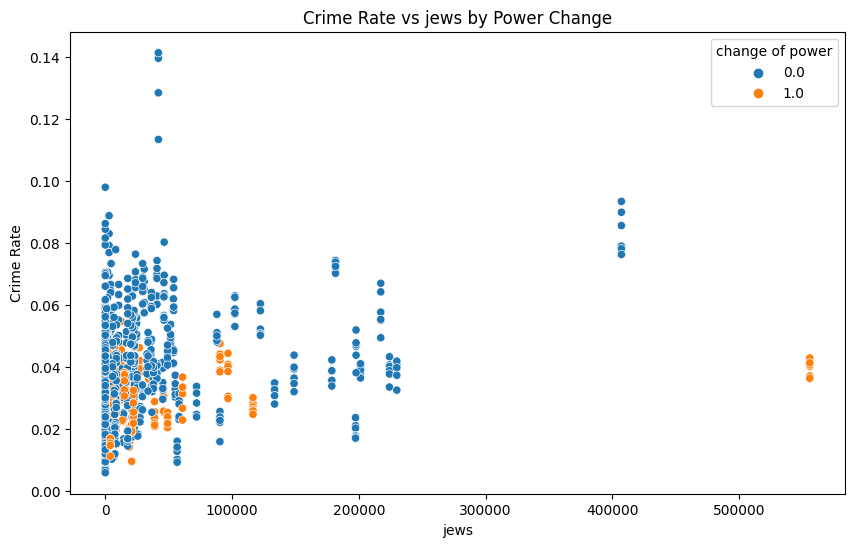

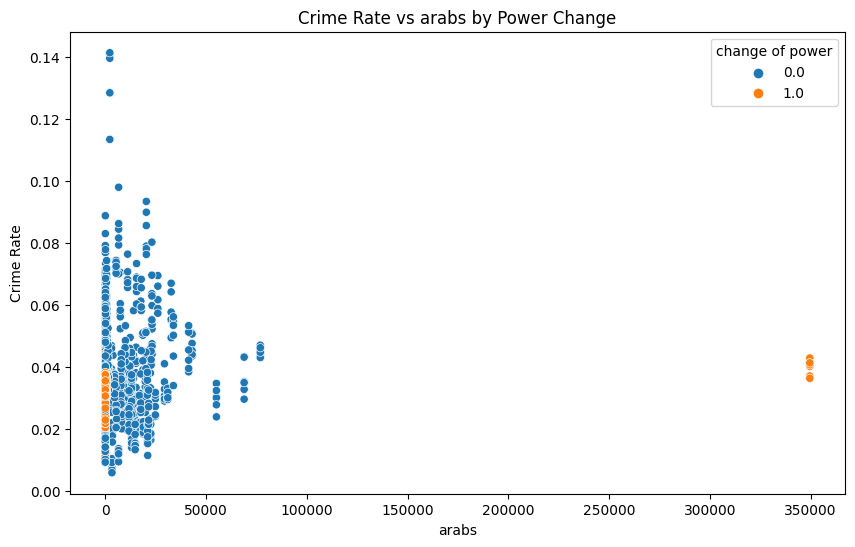

In [40]:
for pop_group in ['jews', 'arabs']:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=pop_group, y='Crime Rate', hue='change of power', data=pivot_data)
    plt.title(f'Crime Rate vs {pop_group} by Power Change')
    plt.show()


In [41]:
pivot_data.columns

Index(['city code', 'city name', 'district', 'religion', 'jews_and_others',
       'jews', 'arabs', 'police_space', 'Dominant Party 19', 'change of power',
       'Year', 'Property Crimes', 'Public Order Crimes',
       'Sexual and Morality Crimes', 'Violent Crimes', 'Total Crimes',
       'Total Population', 'Crime Rate', 'Total Crime Change',
       'Total Crime Decrease'],
      dtype='object', name='Crime Type')

## Outlier Exploration

Outliers for jews_and_others:
Crime Type    city name  jews_and_others
48               ASHDOD         224328.0
49               ASHDOD         224328.0
50               ASHDOD         224328.0
51               ASHDOD         224328.0
52               ASHDOD         224328.0
..                  ...              ...
943         BE'ER SHEVA         203622.0
944         BE'ER SHEVA         203622.0
945         BE'ER SHEVA         203622.0
946         BE'ER SHEVA         203622.0
947         BE'ER SHEVA         203622.0

[96 rows x 2 columns]




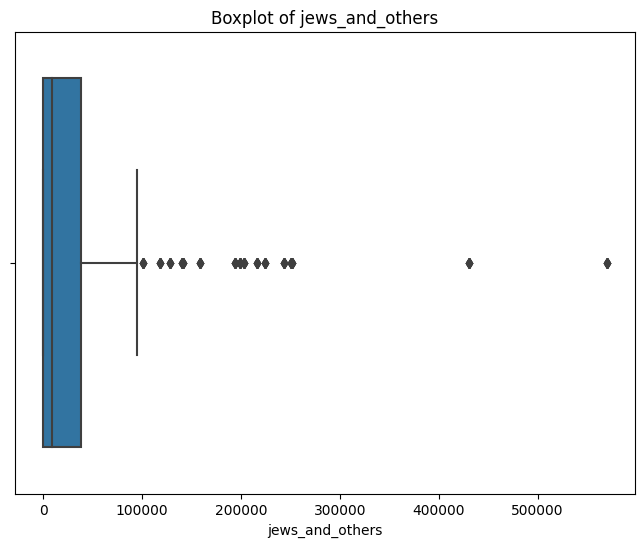

Outliers for jews:
Crime Type                city name     jews
498         MODI'IN-MAKKABBIM-RE'UT  90449.0
499         MODI'IN-MAKKABBIM-RE'UT  90449.0
500         MODI'IN-MAKKABBIM-RE'UT  90449.0
501         MODI'IN-MAKKABBIM-RE'UT  90449.0
502         MODI'IN-MAKKABBIM-RE'UT  90449.0
503         MODI'IN-MAKKABBIM-RE'UT  90449.0
792                       HERZLIYYA  90497.0
793                       HERZLIYYA  90497.0
794                       HERZLIYYA  90497.0
795                       HERZLIYYA  90497.0
796                       HERZLIYYA  90497.0
797                       HERZLIYYA  90497.0




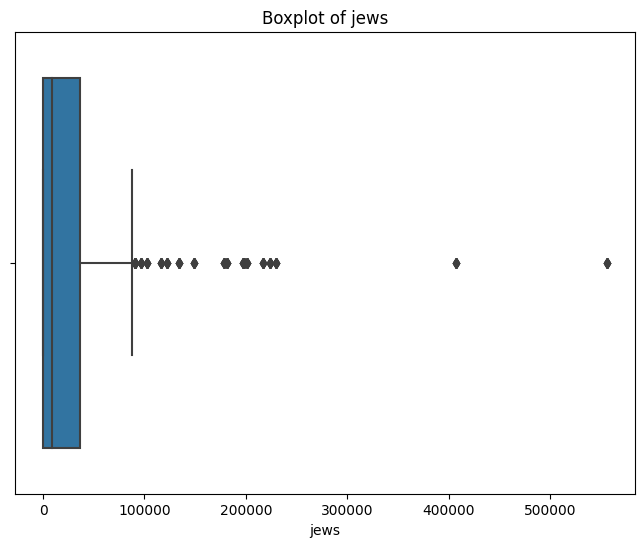

Outliers for arabs:
Crime Type    city name    arabs
486               RAHAT  68904.0
487               RAHAT  68904.0
488               RAHAT  68904.0
489               RAHAT  68904.0
490               RAHAT  68904.0
491               RAHAT  68904.0
660         UMM AL-FAHM  55138.0
661         UMM AL-FAHM  55138.0
662         UMM AL-FAHM  55138.0
663         UMM AL-FAHM  55138.0
664         UMM AL-FAHM  55138.0
665         UMM AL-FAHM  55138.0
672              TAYIBE  43070.0
673              TAYIBE  43070.0
674              TAYIBE  43070.0
675              TAYIBE  43070.0
676              TAYIBE  43070.0
677              TAYIBE  43070.0
846            NAZARETH  76918.0
847            NAZARETH  76918.0
848            NAZARETH  76918.0
849            NAZARETH  76918.0
850            NAZARETH  76918.0
851            NAZARETH  76918.0
858             SAKHNIN  31031.0
859             SAKHNIN  31031.0
860             SAKHNIN  31031.0
861             SAKHNIN  31031.0
862             SAKHNIN

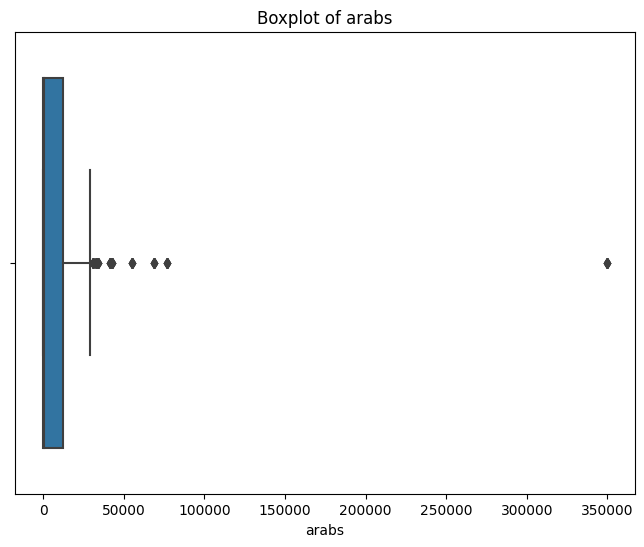

Outliers for police_space:
Crime Type          city name  police_space
66                   TEL MOND    15000060.0
67                   TEL MOND    15000060.0
68                   TEL MOND    15000060.0
69                   TEL MOND    15000060.0
70                   TEL MOND    15000060.0
..                        ...           ...
769         BAQA AL-GHARBIYYE    15002436.0
770         BAQA AL-GHARBIYYE    15002436.0
771         BAQA AL-GHARBIYYE    15002436.0
772         BAQA AL-GHARBIYYE    15002436.0
773         BAQA AL-GHARBIYYE    15002436.0

[138 rows x 2 columns]




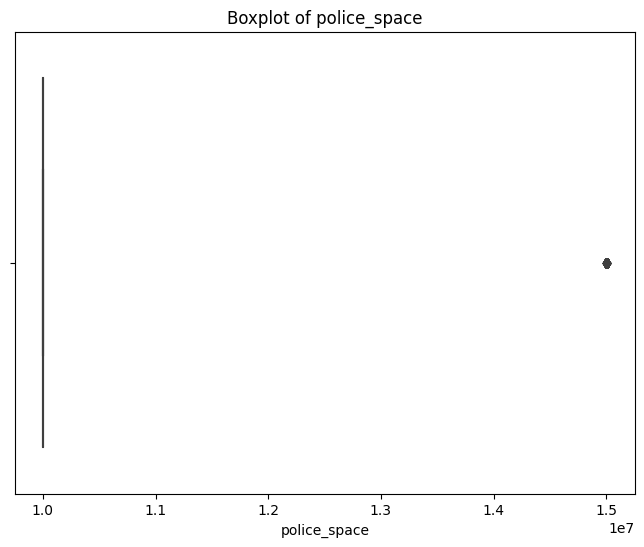

Outliers for Property Crimes:
Crime Type     city name  Property Crimes
618                 ELAT           2514.0
619                 ELAT           2297.0
620                 ELAT           2414.0
621                 ELAT           2234.0
622                 ELAT           2229.0
623                 ELAT           2007.0
798               HADERA           2778.0
799               HADERA           2019.0
800               HADERA           2219.0
801               HADERA           2085.0
802               HADERA           1976.0
803               HADERA           1833.0
816          QIRYAT ATTA           1555.0
828                  LOD           2448.0
829                  LOD           1791.0
830                  LOD           1628.0
831                  LOD           1925.0
832                  LOD           1707.0
833                  LOD           1541.0
873                AFULA           1440.0
912                RAMLA           1944.0
913                RAMLA           1914.0
914 

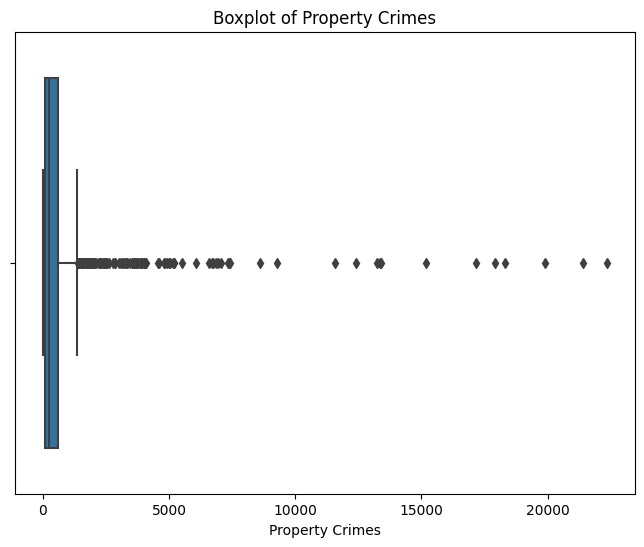

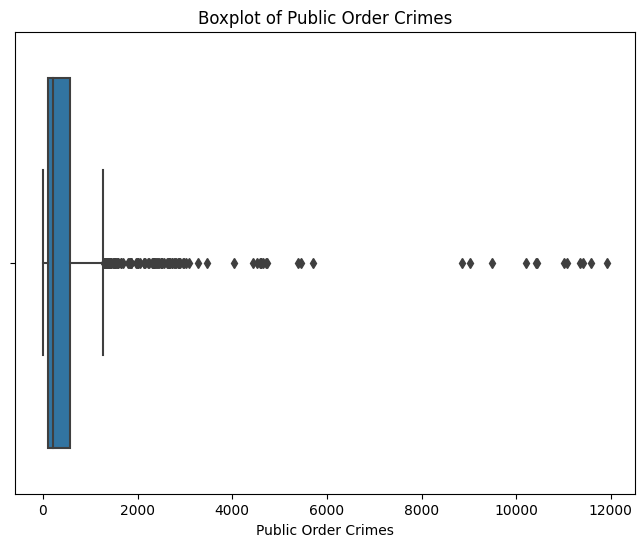

Outliers for Sexual and Morality Crimes:
Crime Type      city name  Sexual and Morality Crimes
462         NAZERAT ILLIT                       479.0
463         NAZERAT ILLIT                       607.0
464         NAZERAT ILLIT                       584.0
465         NAZERAT ILLIT                       632.0
466         NAZERAT ILLIT                       594.0
467         NAZERAT ILLIT                       473.0
810              TIBERIAS                       578.0
811              TIBERIAS                       522.0
812              TIBERIAS                       649.0
813              TIBERIAS                       793.0
814              TIBERIAS                       591.0
864                  AKKO                       556.0
865                  AKKO                       487.0
866                  AKKO                       535.0
867                  AKKO                       678.0
868                  AKKO                       714.0
869                  AKKO                

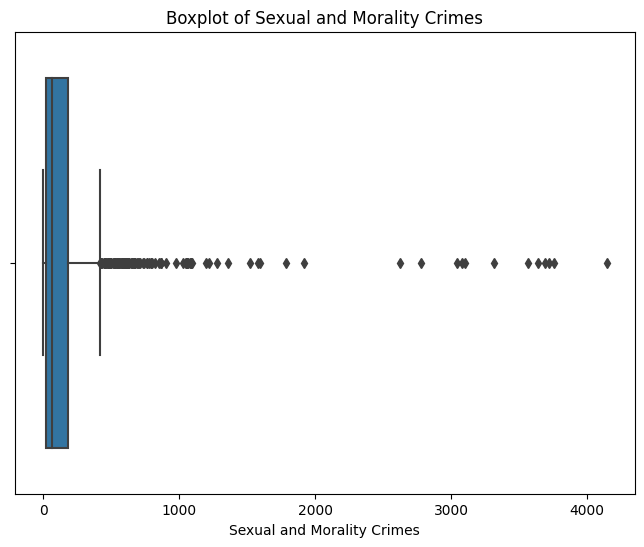

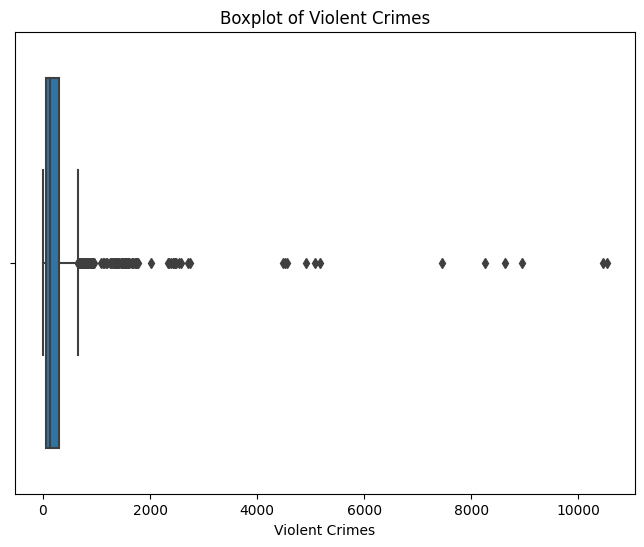

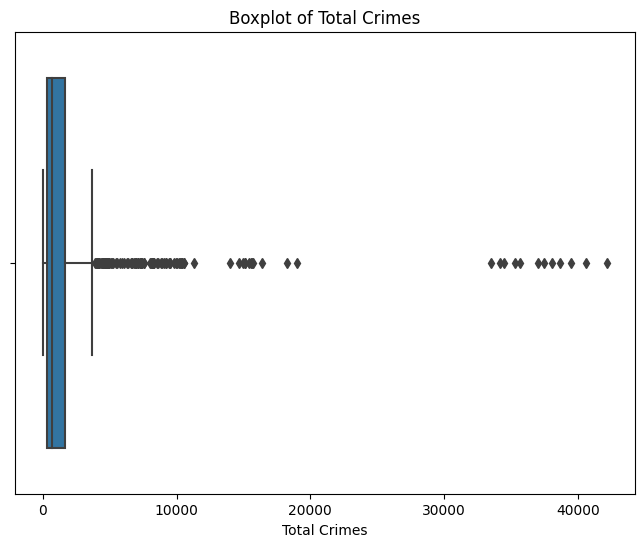

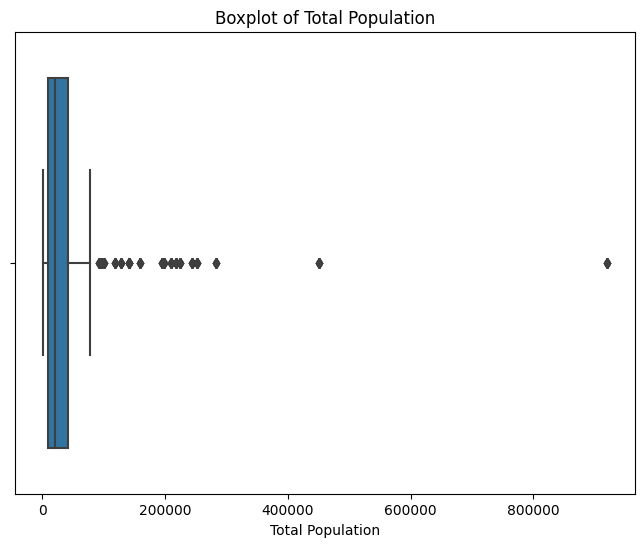

Outliers for Crime Rate:
Crime Type        city name  Crime Rate
0                ROSH PINNA    0.079167
1                ROSH PINNA    0.076923
2                ROSH PINNA    0.088782
3                ROSH PINNA    0.076923
4                ROSH PINNA    0.083013
408         TUBA-ZANGARIYYE    0.079346
409         TUBA-ZANGARIYYE    0.081596
410         TUBA-ZANGARIYYE    0.097945
411         TUBA-ZANGARIYYE    0.084446
413         TUBA-ZANGARIYYE    0.086246
526                   METAR    0.077862




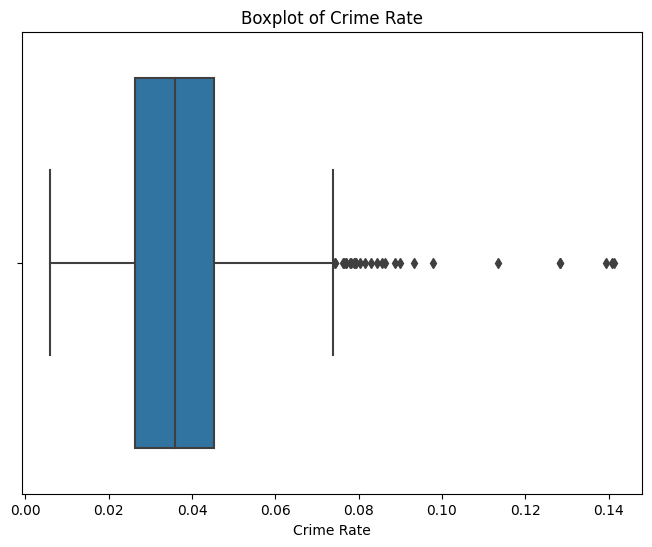

Outliers for Total Crime Change:
Crime Type            city name  Total Crime Change
117                     NETIVOT               261.0
369                  KAFAR QARA              -222.0
481                    KARMI'EL               312.0
514                      HARISH               260.0
571                TIRAT KARMEL              -314.0
575                TIRAT KARMEL              -369.0
577                      DIMONA              -220.0
580                      DIMONA               345.0
605               BE'ER YA'AQOV              -327.0
640                  QIRYAT GAT               239.0
645                 ROSH HAAYIN               258.0
651              RAMAT HASHARON              -262.0
652              RAMAT HASHARON               232.0
653              RAMAT HASHARON              -216.0
668                        TIRE               277.0
681              QIRYAT SHEMONA               212.0
683              QIRYAT SHEMONA              -219.0
713              MA'ALE ADUMMIM

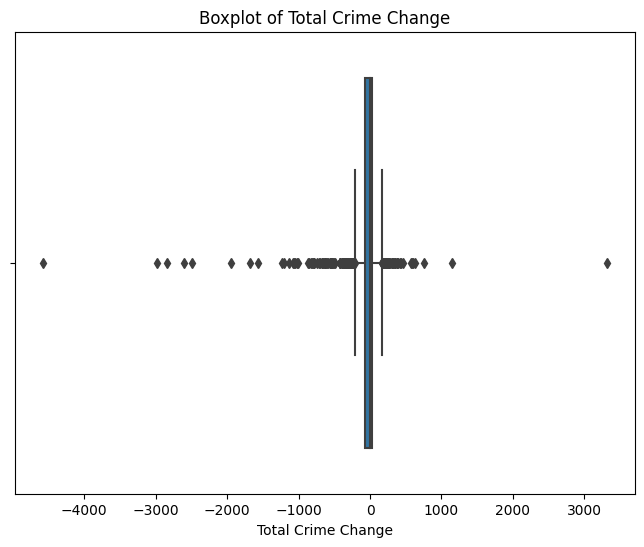

In [42]:
features = ['jews_and_others', 'jews', 'arabs', 
            'police_space', 'Property Crimes', 
            'Public Order Crimes', 'Sexual and Morality Crimes', 'Violent Crimes', 
            'Total Crimes', 'Total Population', 'Crime Rate','Total Crime Change']


seen_cities = set()

for feature in features:
    Q1 = pivot_data[feature].quantile(0.25)
    Q3 = pivot_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    outlier_mask = (pivot_data[feature] < (Q1 - 1.5 * IQR)) | (pivot_data[feature] > (Q3 + 1.5 * IQR))
    outliers = pivot_data[outlier_mask][['city name', feature]]
    outliers = outliers[~outliers['city name'].isin(seen_cities)]
    seen_cities.update(outliers['city name'])

    if not outliers.empty:
        print(f"Outliers for {feature}:")
        print(outliers)
        print("\n")
    
    plt.figure(figsize=(8,6))
    sns.boxplot(x=pivot_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



### Using the Z-score method to identify outliers

In [43]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city code                   996 non-null    int32  
 1   city name                   996 non-null    object 
 2   district                    996 non-null    int64  
 3   religion                    996 non-null    float64
 4   jews_and_others             996 non-null    float64
 5   jews                        996 non-null    float64
 6   arabs                       996 non-null    float64
 7   police_space                996 non-null    float64
 8   Dominant Party 19           996 non-null    object 
 9   change of power             996 non-null    float64
 10  Year                        996 non-null    object 
 11  Property Crimes             996 non-null    float64
 12  Public Order Crimes         996 non-null    float64
 13  Sexual and Morality Crimes  996 non

In [44]:
features = ['jews_and_others', 'jews', 'arabs', 
            'police_space','Property Crimes', 
            'Public Order Crimes', 'Sexual and Morality Crimes', 'Violent Crimes', 
            'Total Crimes', 'Total Population', 'Crime Rate', 'Total Crime Change']

outliers = {}  

for feature in features:
    z_scores = np.abs(stats.zscore(pivot_data[feature]))  
    outlier_indices = np.where(z_scores > 3)[0] 
    outlier_cities = pivot_data.iloc[outlier_indices]['city name'].unique() 
    outliers[feature] = outlier_cities

for feature, cities in outliers.items():
    print(f"{feature}: {', '.join(cities)}")


jews_and_others: JERUSALEM, TEL AVIV - YAFO
jews: JERUSALEM, TEL AVIV - YAFO
arabs: JERUSALEM
police_space: 
Property Crimes: JERUSALEM, HAIFA, TEL AVIV - YAFO, BE'ER SHEVA
Public Order Crimes: JERUSALEM, HAIFA, TEL AVIV - YAFO, BE'ER SHEVA
Sexual and Morality Crimes: JERUSALEM, HAIFA, TEL AVIV - YAFO
Violent Crimes: JERUSALEM, TEL AVIV - YAFO
Total Crimes: JERUSALEM, HAIFA, TEL AVIV - YAFO
Total Population: JERUSALEM, TEL AVIV - YAFO
Crime Rate: ROSH PINNA, TUBA-ZANGARIYYE, ELAT, TEL AVIV - YAFO
Total Crime Change: JERUSALEM, HAIFA, TEL AVIV - YAFO, LOD, ASHQELON, NETANYA, RISHON LEZIYYON, RAMLA


### Analyzing the results of Z-score method:

1. It is very noticable that 'Jerusalem' and 'Tel Aviv - Yafo' are outliers for many features, this is not surprising finding as these two cities are two of the most populated in israel and expected to higher absoulte values for many categories of crimes.

2. We can see that some small cities such as 'Abu Gosh' and 'Tuba' and 'Elat' have unuaslly high crimes cates compared to other cities, this is expected for 'Elat' since it is a touristic city, but not for 'Abu Gosh' and 'Tuba', this could be due to many reasons such as local socio-economics factors.

3. Some cities are outliers for specific types of crimes, for example 'Elyakhin' and 'Kefar Tavor' and 'Lehavim' have a high proportion of property crimes, while 'Metula' and 'Kusefie' and 'Metar' have a high proportion of public order crimes, this may suggest that different areas may have different types of crimes that more widespread.

In [45]:
pivot_data

Crime Type,city code,city name,district,religion,jews_and_others,jews,arabs,police_space,Dominant Party 19,change of power,Year,Property Crimes,Public Order Crimes,Sexual and Morality Crimes,Violent Crimes,Total Crimes,Total Population,Crime Rate,Total Crime Change,Total Crime Decrease
0,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2014,113.0,60.0,54.0,20.0,247.0,3120.0,0.079167,0.0,0
1,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2015,91.0,72.0,47.0,30.0,240.0,3120.0,0.076923,-7.0,1
2,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2016,106.0,93.0,57.0,21.0,277.0,3120.0,0.088782,37.0,0
3,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2017,97.0,74.0,47.0,22.0,240.0,3120.0,0.076923,-37.0,1
4,26,ROSH PINNA,2,1.0,3081.0,3007.0,39.0,10004540.0,1,0.0,2018,106.0,73.0,56.0,24.0,259.0,3120.0,0.083013,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2015,325.0,150.0,47.0,67.0,589.0,15627.0,0.037691,-9.0,1
992,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2016,279.0,146.0,31.0,55.0,511.0,15627.0,0.032700,-78.0,1
993,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2017,303.0,171.0,56.0,57.0,587.0,15627.0,0.037563,76.0,0
994,9800,BINYAMINA-GIV'AT ADA,3,1.0,15598.0,15081.0,29.0,10004333.0,1,1.0,2018,304.0,136.0,58.0,58.0,556.0,15627.0,0.035579,-31.0,1


Normalizing the data

In [46]:
scaler = MinMaxScaler()

features = ['jews_and_others', 'jews', 'arabs', 
            'police_space', 'Property Crimes', 
            'Public Order Crimes', 'Sexual and Morality Crimes', 'Violent Crimes', 
            'Total Crimes', 'Total Population', 'Crime Rate', 'Total Crime Change']


scaled_data = scaler.fit_transform(pivot_data[features])
pivot_data.loc[:, features] = scaled_data


In [47]:
pivot_data

Crime Type,city code,city name,district,religion,jews_and_others,jews,arabs,police_space,Dominant Party 19,change of power,Year,Property Crimes,Public Order Crimes,Sexual and Morality Crimes,Violent Crimes,Total Crimes,Total Population,Crime Rate,Total Crime Change,Total Crime Decrease
0,26,ROSH PINNA,2,1.0,0.005403,0.005408,0.000109,0.000622,1,0.0,2014,0.004836,0.004786,0.013028,0.001710,0.005386,0.002046,0.540874,0.580101,0
1,26,ROSH PINNA,2,1.0,0.005403,0.005408,0.000109,0.000622,1,0.0,2015,0.003851,0.005794,0.011339,0.002660,0.005220,0.002046,0.524288,0.579214,1
2,26,ROSH PINNA,2,1.0,0.005403,0.005408,0.000109,0.000622,1,0.0,2016,0.004522,0.007557,0.013752,0.001805,0.006098,0.002046,0.611957,0.584791,0
3,26,ROSH PINNA,2,1.0,0.005403,0.005408,0.000109,0.000622,1,0.0,2017,0.004119,0.005962,0.011339,0.001900,0.005220,0.002046,0.524288,0.575412,1
4,26,ROSH PINNA,2,1.0,0.005403,0.005408,0.000109,0.000622,1,0.0,2018,0.004522,0.005878,0.013510,0.002090,0.005671,0.002046,0.569307,0.582510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9800,BINYAMINA-GIV'AT ADA,3,1.0,0.027368,0.027130,0.000080,0.000580,1,1.0,2015,0.014328,0.012344,0.011339,0.006175,0.013501,0.015668,0.234263,0.578961,1
992,9800,BINYAMINA-GIV'AT ADA,3,1.0,0.027368,0.027130,0.000080,0.000580,1,1.0,2016,0.012268,0.012008,0.007479,0.005035,0.011650,0.015668,0.197363,0.570215,1
993,9800,BINYAMINA-GIV'AT ADA,3,1.0,0.027368,0.027130,0.000080,0.000580,1,1.0,2017,0.013343,0.014107,0.013510,0.005225,0.013454,0.015668,0.233316,0.589734,0
994,9800,BINYAMINA-GIV'AT ADA,3,1.0,0.027368,0.027130,0.000080,0.000580,1,1.0,2018,0.013388,0.011168,0.013993,0.005320,0.012718,0.015668,0.218651,0.576172,1


array([[<Axes: title={'center': 'Property Crimes'}>,
        <Axes: title={'center': 'Public Order Crimes'}>,
        <Axes: title={'center': 'Sexual and Morality Crimes'}>],
       [<Axes: title={'center': 'Violent Crimes'}>,
        <Axes: title={'center': 'Total Crimes'}>,
        <Axes: title={'center': 'Total Population'}>],
       [<Axes: title={'center': 'Crime Rate'}>,
        <Axes: title={'center': 'Total Crime Change'}>,
        <Axes: title={'center': 'Total Crime Decrease'}>]], dtype=object)

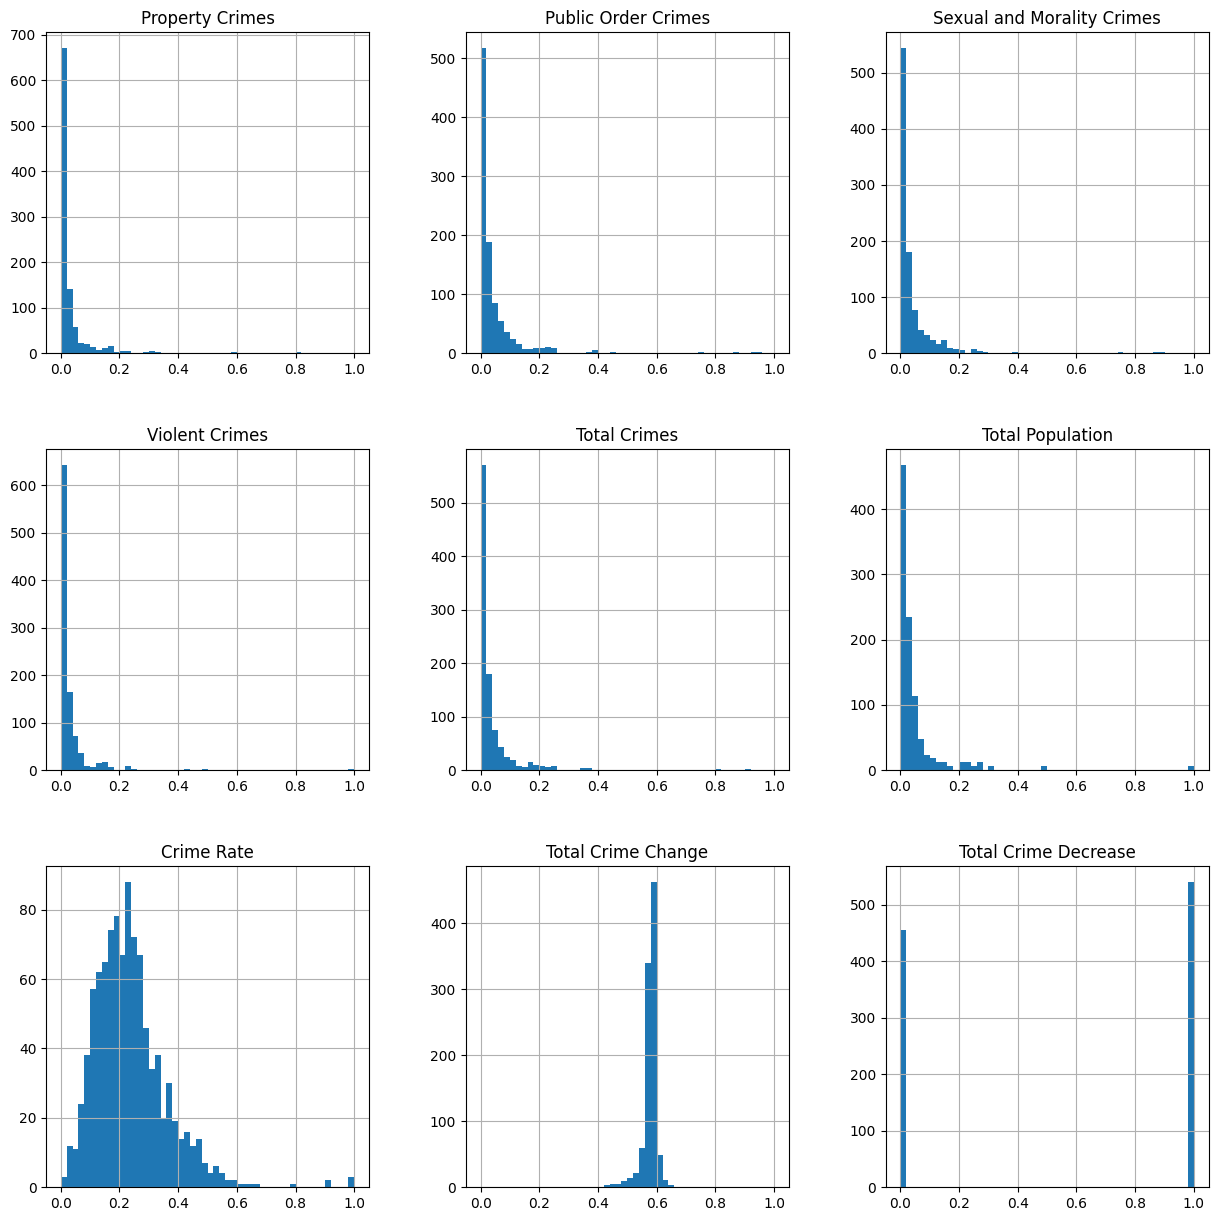

In [48]:
#histogram 
pivot_data.iloc[:,-9:].hist(bins=50, figsize=(15, 15))

## Feature Exploration - Collinearity

In [49]:
len(pivot_data.columns)

20

Correclation Heatmap:

In [50]:
corr = pivot_data.iloc[:, -18:].corr()
corr.style.background_gradient(cmap='coolwarm')

Crime Type,district,religion,jews_and_others,jews,arabs,police_space,Dominant Party 19,change of power,Year,Property Crimes,Public Order Crimes,Sexual and Morality Crimes,Violent Crimes,Total Crimes,Total Population,Crime Rate,Total Crime Change,Total Crime Decrease
Crime Type,,,,,,,,,,,,,,,,,,
district,1.000000,-0.346675,0.125111,0.120084,-0.187307,0.002304,0.178221,0.121393,0.000000,0.091488,0.066178,0.028976,0.024650,0.067785,0.041381,0.043670,-0.021293,0.035797
religion,-0.346675,1.000000,0.148017,0.147575,0.479038,0.073546,-0.154951,-0.222203,-0.000000,0.313878,0.348245,0.380992,0.349073,0.343087,0.273579,0.138443,-0.158405,-0.050073
jews_and_others,0.125111,0.148017,1.000000,0.998867,0.461573,-0.153246,0.205287,0.083649,0.000000,0.903127,0.922529,0.878775,0.896614,0.924022,0.958705,0.207710,-0.428757,0.075704
jews,0.120084,0.147575,0.998867,1.000000,0.480626,-0.149243,0.199853,0.095791,0.000000,0.898929,0.921012,0.877417,0.900388,0.922270,0.963894,0.193271,-0.427783,0.075870
arabs,-0.187307,0.479038,0.461573,0.480626,1.000000,0.017497,-0.042095,0.062029,0.000000,0.437458,0.602189,0.545356,0.739754,0.560776,0.694806,0.027134,-0.196327,-0.051091
police_space,0.002304,0.073546,-0.153246,-0.149243,0.017497,1.000000,-0.091405,0.011139,-0.000000,-0.124067,-0.121650,-0.127901,-0.107732,-0.123229,-0.118631,-0.122383,0.086346,-0.070058
Dominant Party 19,0.178221,-0.154951,0.205287,0.199853,-0.042095,-0.091405,1.000000,-0.418005,0.000000,0.061027,0.109198,0.102412,0.122359,0.091513,0.152936,0.173645,-0.050343,0.005747
change of power,0.121393,-0.222203,0.083649,0.095791,0.062029,0.011139,-0.418005,1.000000,0.000000,0.020558,0.024202,0.019269,0.061908,0.029691,0.087702,-0.194773,-0.026407,0.068018
Year,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,-0.032400,-0.017083,0.024593,-0.011027,-0.019405,0.000000,-0.041505,-0.066571,0.090285


    ** Important to notice! Correlation does not imply causation! there can be many reasons and underlaying factors that can cause the correlation between the features. **

Correlation Analysis:

1. The high correlation between the different types of crimes is not surprising, as regions with high incidence of one type of crime are likely to have high incidence of other types of crimes, this is because crime level is affected by many factors such as socioeconomic factors, population density, and more, which all can affect the different types of crimes.



In [51]:
pivot_data['Year'] = pivot_data['Year'].astype(int)

## Prepaing the data for the models we are going to use

### Splitting the data into train and test sets

In [52]:
# Splitting the data based on the 'Year' column
train_data = pivot_data[pivot_data['Year'] < 2019]
test_data = pivot_data[pivot_data['Year'] == 2019]
#normalize 'Year' column
train_data['Year'] = train_data['Year'] - 2000
test_data['Year'] = test_data['Year'] - 2000
# Identifying dependent and independent variables
dependent_vars = ['Total Crime Decrease']
independent_vars = [col for col in pivot_data.columns if col not in dependent_vars]

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20836\2543867270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year'] = train_data['Year'] - 2000
C:\Users\Rafael\AppData\Local\Temp\ipykernel_20836\2543867270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Year'] = test_data['Year'] - 2000


#### Domain Knowledge - we decided to drop the following features from the dataset, due to direct relation to the target variable, or because they are not relevant to our analysis like ids and names.

In [53]:
independent_vars

['city code',
 'city name',
 'district',
 'religion',
 'jews_and_others',
 'jews',
 'arabs',
 'police_space',
 'Dominant Party 19',
 'change of power',
 'Year',
 'Property Crimes',
 'Public Order Crimes',
 'Sexual and Morality Crimes',
 'Violent Crimes',
 'Total Crimes',
 'Total Population',
 'Crime Rate',
 'Total Crime Change']

In [54]:
independent_vars.remove('city code')
independent_vars.remove('city name')
independent_vars.remove('Property Crimes')
independent_vars.remove('Violent Crimes')
independent_vars.remove('Sexual and Morality Crimes')
independent_vars.remove('Public Order Crimes')
independent_vars.remove('Total Crimes')
independent_vars.remove('Total Crime Change')
independent_vars.remove('Crime Rate')


In [55]:
independent_vars

['district',
 'religion',
 'jews_and_others',
 'jews',
 'arabs',
 'police_space',
 'Dominant Party 19',
 'change of power',
 'Year',
 'Total Population']

#### Splitting the data into X (Features) and y (Lables)

In [56]:
X_train = train_data[independent_vars]
y_train = train_data[dependent_vars]

X_test = test_data[independent_vars]
y_test = test_data[dependent_vars]

X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [57]:
y_train['Total Crime Decrease'].value_counts()

Total Crime Decrease
1.0    428
0.0    402
Name: count, dtype: int64

## Feature Selection

### Using LASO algorithm to select the most important features

In [58]:
Top_features_LASO =[]

lasso = MultiTaskLassoCV(max_iter=3000, tol=1e-4).fit(X_train, y_train)
importance = np.abs(lasso.coef_)

for target in range(importance.shape[0]):
    
    threshold = np.sort(importance[target])[-7]
    for i, coef in enumerate(importance[target]):
        if coef >= threshold:
                Top_features_LASO.append(X_train.columns[i])
                print(f"Keep feature {X_train.columns[i]} with importance {coef}")
    
    #choose features with importance > 0
    Top_features_LASO = [x for x in Top_features_LASO if x != 0]

    #change test and train data to include only the top features
    X_train = X_train[Top_features_LASO]
    X_test = X_test[Top_features_LASO]

Keep feature district with importance 0.004944391801523424
Keep feature jews with importance 0.28141113436735693
Keep feature arabs with importance 0.45204328954884726
Keep feature police_space with importance 0.05687801491077357
Keep feature Dominant Party 19 with importance 0.02147878629703431
Keep feature change of power with importance 0.09255447229056289
Keep feature Year with importance 0.0043053536802497815


    We have decided to use all the features in our analysis, since we have a small number of features and not a lot of observations, we do not want to lose any information that could be useful for our analysis.

# Testing Different Models & Evaluating Each Model

## Support Vector Machine Classifier

In [59]:
param_grid = {'kernel': ['linear'], 'gamma': [0.1, 1, 10]}
svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train['Total Crime Decrease'])

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions_svm = best_model.predict(X_test)

Fitting 9 folds for each of 3 candidates, totalling 27 fits


Best parameters: {'gamma': 0.1, 'kernel': 'linear'}


## SVM Evaluation

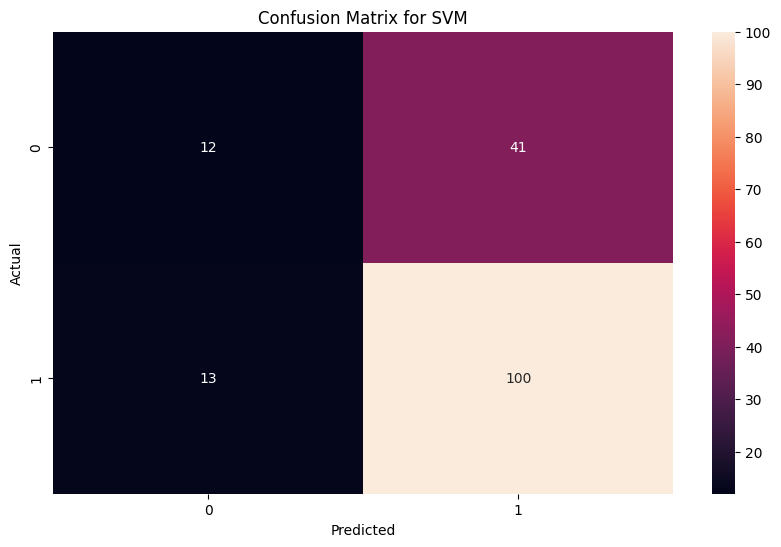

,Model,Recall,Precision,Specificity,Accuracy
0,SVM,0.884956,0.70922,0.29078,0.674699


In [60]:
cm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

recall_svm = recall_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm)
specificity_svm = 1 - precision_svm
accuracy_svm = accuracy_score(y_test, predictions_svm)
#put in df
SVM = pd.DataFrame({'Model': 'SVM', 'Recall': recall_svm, 'Precision': precision_svm, 'Specificity': specificity_svm, 'Accuracy': accuracy_svm}, index=[0])
SVM

# Random Forest Classifier

In [61]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth' : [2,3,4,5,6,7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train['Total Crime Decrease'])

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions_rf = best_model.predict(X_test)


Fitting 9 folds for each of 72 candidates, totalling 648 fits


c:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}


## Random Forest Evaluatinon

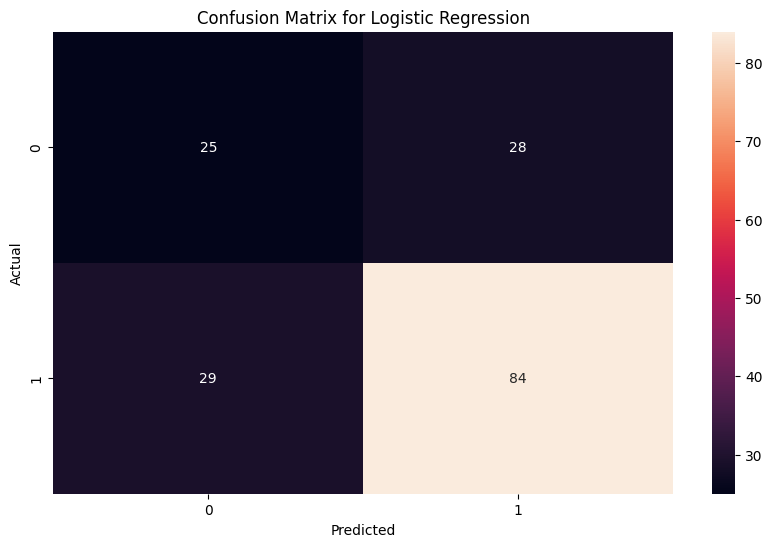

,Model,Recall,Precision,Specificity,Accuracy
0,Random Forest,0.743363,0.75,0.25,0.656627


In [62]:
cm = confusion_matrix(y_test, predictions_rf)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

recall_rf = recall_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf)
specificity_rf = 1 - precision_rf
accuracy_rf = accuracy_score(y_test, predictions_rf)
#put in df
RF = pd.DataFrame({'Model': 'Random Forest', 'Recall': recall_rf, 'Precision': precision_rf, 'Specificity': specificity_rf, 'Accuracy': accuracy_rf}, index=[0])
RF

# Ada Boost Classifier

In [63]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

ada = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train['Total Crime Decrease'])

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions_ada = best_model.predict(X_test)


Fitting 9 folds for each of 12 candidates, totalling 108 fits


Best parameters: {'learning_rate': 0.05, 'n_estimators': 100}


## Evaluating Ada Boost

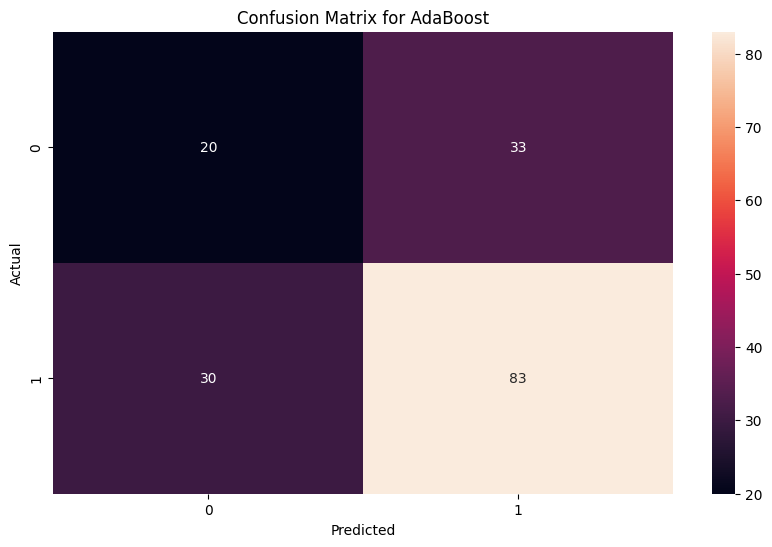

,Model,Recall,Precision,Specificity,Accuracy
0,ADA BOOST,0.734513,0.715517,0.284483,0.620482


In [64]:
cm = confusion_matrix(y_test, predictions_ada)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

recall_ada= recall_score(y_test, predictions_ada)
precision_ada = precision_score(y_test, predictions_ada)
specificity_ada = 1 - precision_ada
accuracy_ada = accuracy_score(y_test, predictions_ada)
#put in df
ADA = pd.DataFrame({'Model': 'ADA BOOST', 'Recall': recall_ada, 'Precision': precision_ada, 'Specificity': specificity_ada, 'Accuracy': accuracy_ada}, index=[0])
ADA

# Comparing between the models

In [65]:
models = pd.concat([RF, SVM,ADA], axis=0)
models.reset_index(drop=True, inplace=True)
models

,Model,Recall,Precision,Specificity,Accuracy
0,Random Forest,0.743363,0.750000,0.250000,0.656627
1,SVM,0.884956,0.709220,0.290780,0.674699
2,ADA BOOST,0.734513,0.715517,0.284483,0.620482


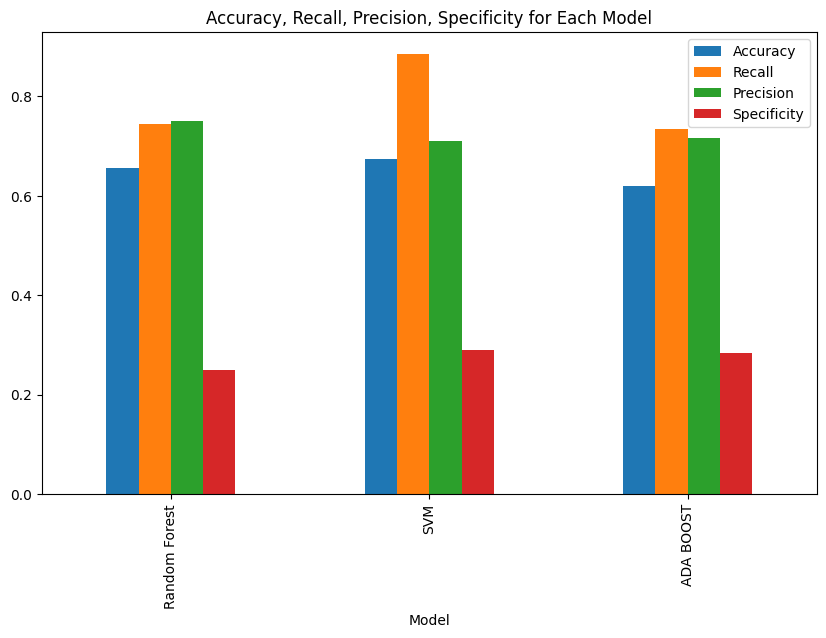

In [66]:
models.plot(kind='bar', x='Model', y=['Accuracy', 'Recall', 'Precision', 'Specificity'], figsize=(10,6))
plt.title('Accuracy, Recall, Precision, Specificity for Each Model')
plt.show()
